Libraries imported successfully
Base Directory: C:/Users/User/Desktop/OSIRI UNIVERSITY Files/diabetes_prediction_dashboard
Data Directory: C:/Users/User/Desktop/OSIRI UNIVERSITY Files/diabetes_prediction_dashboard\data
Models Directory: C:/Users/User/Desktop/OSIRI UNIVERSITY Files/diabetes_prediction_dashboard\models
=== Loading Data ===
Loading from: C:/Users/User/Desktop/OSIRI UNIVERSITY Files/diabetes_prediction_dashboard\data\diabetes_prediction_dataset.csv
✓ Dataset loaded successfully!
Dataset Shape: (100000, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  obj

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0



Summary Statistics:


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000



=== Data Quality Assessment ===

1. Missing Values per Column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

2. Number of Duplicate Rows: 3854

3. Data Types:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

gender unique values: ['Female' 'Male' 'Other']
Counts:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

smoking_history unique values: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Counts:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     

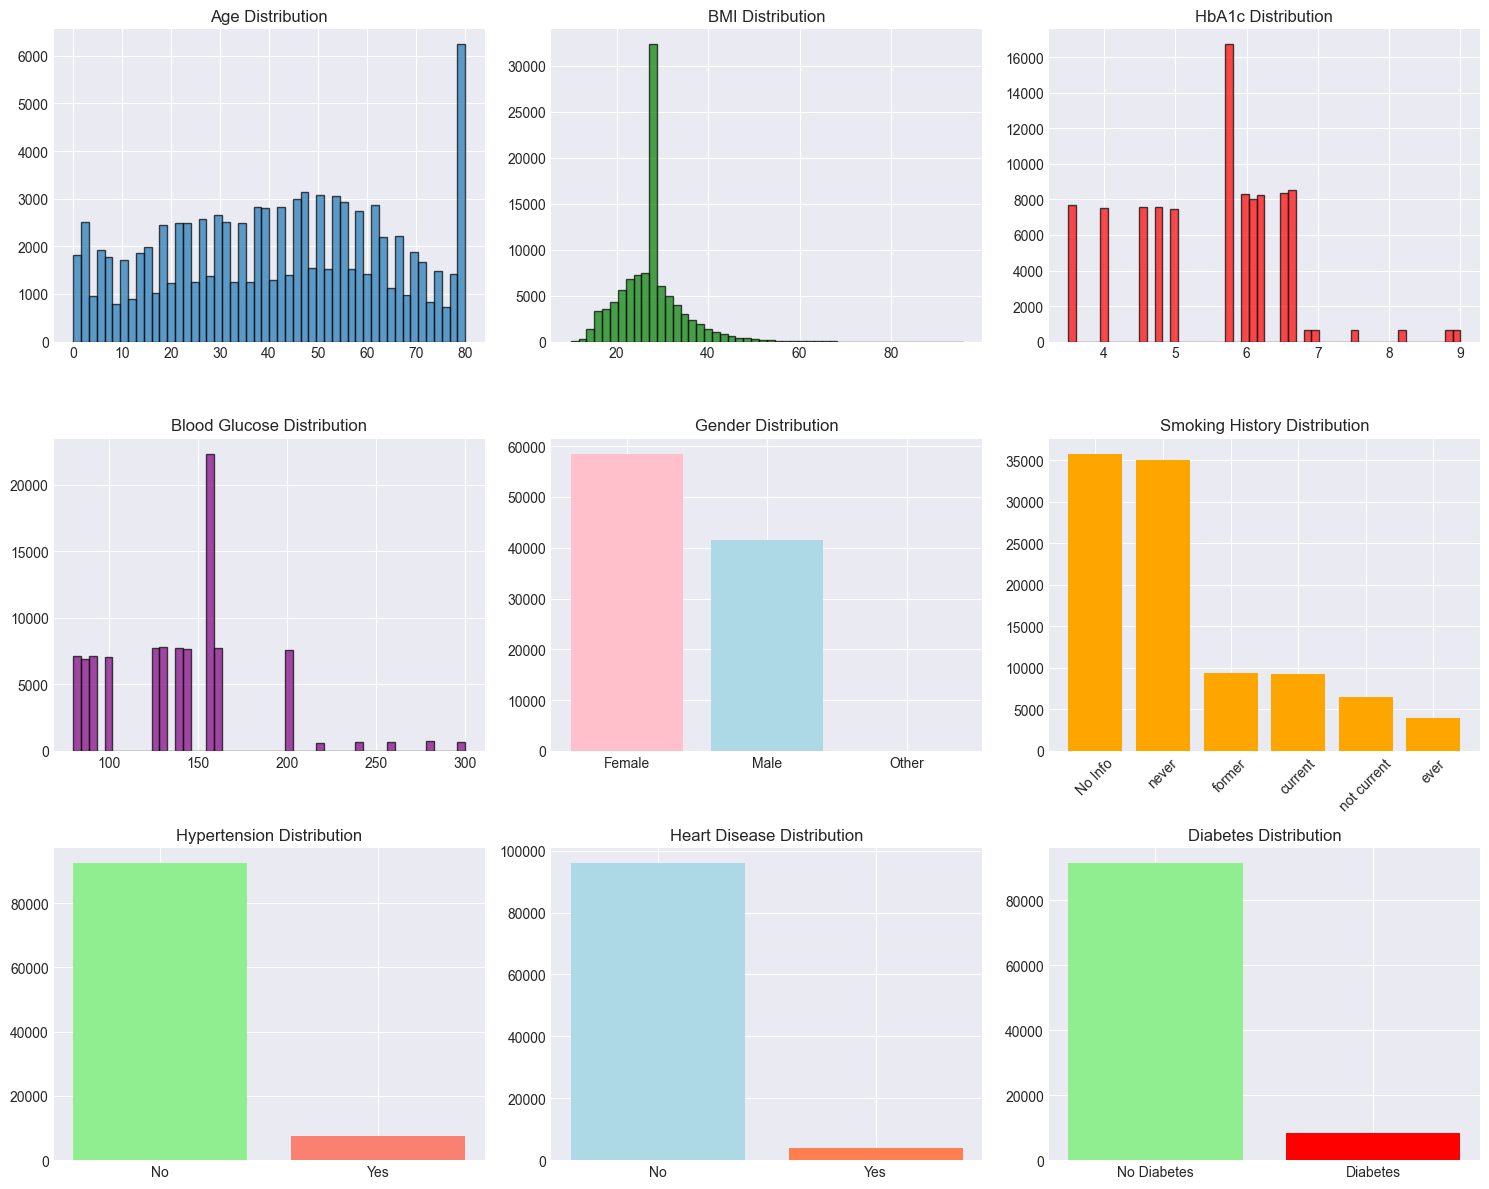


=== Data Preprocessing ===
1. Removed 3854 duplicate rows
   New dataset shape: (96146, 9)

2. Capping outliers...
   age: Lower=-28.50, Upper=111.50
   bmi: Lower=13.71, Upper=39.55
   HbA1c_level: Lower=2.70, Upper=8.30
   blood_glucose_level: Lower=11.50, Upper=247.50

3. Encoding categorical variables...
   Categorical variables encoded successfully

=== Feature Scaling ===
Features scaled successfully
X shape: (96146, 13), y shape: (96146,)

=== Saving Cleaned Data ===
✓ Cleaned data saved as: C:/Users/User/Desktop/OSIRI UNIVERSITY Files/diabetes_prediction_dashboard\data\cleaned_diabetes_data.csv
  File exists: True
  File size: 11489.80 KB

Sample of cleaned data:


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_No Info,smoking_current,smoking_ever,smoking_former,smoking_never,smoking_not current,diabetes
0,0,1.700840,0,1,-0.310970,1.024846,0.064090,False,False,False,False,True,False,0
1,0,0.543372,0,0,0.048828,1.024846,-1.488726,True,False,False,False,False,False,0
2,1,-0.614096,0,0,0.048828,0.167291,0.529935,False,False,False,False,True,False,0
3,0,-0.257952,0,0,-0.604890,-0.499697,0.452295,False,True,False,False,False,False,0
4,1,1.522768,1,1,-1.164014,-0.690265,0.452295,False,True,False,False,False,False,0


In [ ]:
# 01_data_exploration.ipynb 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

def main():
    print("\n=== 01: DATA EXPLORATION (EDA) ===")
    
    # Load from the SAME location as main script
    DATA_PATH = r"C:\Users\User\Desktop\OSIRI UNIVERSITY Files\diabetes_prediction_dashboard\data\diabetes_prediction_dataset.csv"
    
    # Load dataset
    df = pd.read_csv(DATA_PATH)
    
    print(f"\nDataset Shape: {df.shape}")
    print(f"\nFirst 5 rows:")
    print(df.head())
    
    # Basic info
    print("\nDataset Info:")
    print(df.info())
    
    # Missing values
    print("\nMissing Values per Column:")
    print(df.isna().sum())
    
    # Duplicates
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    
    # Summary stats
    print("\nSummary Statistics (numeric):")
    print(df.describe())
    
    # Target distribution
    if "diabetes" in df.columns:
        target_counts = df["diabetes"].value_counts()
        target_percent = (target_counts / len(df)) * 100
        
        print("\nTarget Distribution (Counts):")
        print(target_counts)
        
        print("\nTarget Distribution (Percent):")
        print(target_percent)
        
        # Visualization
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.bar(["Non-Diabetic (0)", "Diabetic (1)"], target_counts.values)
        plt.title("Class Distribution")
        plt.xlabel("Class")
        plt.ylabel("Count")
        
        plt.subplot(1, 2, 2)
        plt.pie(target_counts.values, labels=["Non-Diabetic", "Diabetic"], 
                autopct='%1.1f%%', colors=['lightblue', 'salmon'])
        plt.title("Class Proportions")
        
        plt.tight_layout()
        plt.show()
    
    # Quick numeric distributions
    numeric_cols = [c for c in ["age", "bmi", "HbA1c_level", "blood_glucose_level"] if c in df.columns]
    
    if numeric_cols:
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.flatten()
        
        for idx, col in enumerate(numeric_cols[:4]):
            axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f"Distribution of {col}")
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel("Frequency")
        
        plt.tight_layout()
        plt.show()
    
    # Correlation matrix
    numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'hypertension', 'heart_disease', 'diabetes']
    numeric_columns = [col for col in numeric_columns if col in df.columns]
    
    if len(numeric_columns) > 1:
        correlation_matrix = df[numeric_columns].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
        plt.title('Correlation Matrix')
        plt.tight_layout()
        plt.show()
    
    # Boxplots by target
    if "diabetes" in df.columns and numeric_cols:
        print("\nMean values by diabetes class:")
        for col in numeric_cols:
            means = df.groupby("diabetes")[col].mean()
            print(f"{col}: Non-Diabetic={means[0]:.2f}, Diabetic={means[1]:.2f}, Difference={means[1]-means[0]:.2f}")
        
        # Boxplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes = axes.flatten()
        
        for idx, col in enumerate(numeric_cols[:4]):
            sns.boxplot(x='diabetes', y=col, data=df, ax=axes[idx])
            axes[idx].set_title(f'{col} by Diabetes Status')
            axes[idx].set_xlabel('Diabetes (0=No, 1=Yes)')
            axes[idx].set_ylabel(col)
        
        plt.tight_layout()
        plt.show()
    
    print("\n EDA complete. Data is ready for preprocessing in main pipeline.")

if __name__ == "__main__":
    main()